In [1]:
import projX
import pyemma
import numpy as np
from matplotlib import pylab as plt
%matplotlib notebook

In [4]:
trajfile = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/c-alpha_centered.stride.100.xtc'
trajfile = trajfile.split('/')[-1]
top  = '/group/ag_cmb/scratch/gph82/work/CMB/hierarchical_TICA/bpti-shaw/DESRES-Trajectory-bpti-c-alpha/bpti-c-alpha_centered.pdb'
top = top.split('/')[-1]

Skip this part if you already have an Y.npy file

In [3]:
feat = pyemma.coordinates.featurizer(top)
pairs = feat.pairs(range(feat.topology.n_atoms)[::2])
feat.add_distances(pairs)
src  = pyemma.coordinates.source(trajfile, features=feat)
tica = pyemma.coordinates.tica(src, lag=10, dim=2)
Y = tica.get_output()[0]
np.save('Y.npy', Y)

# Look at the -log(PDF) plot and wonder what the coordinates mean...

<IPython.core.display.Javascript object>


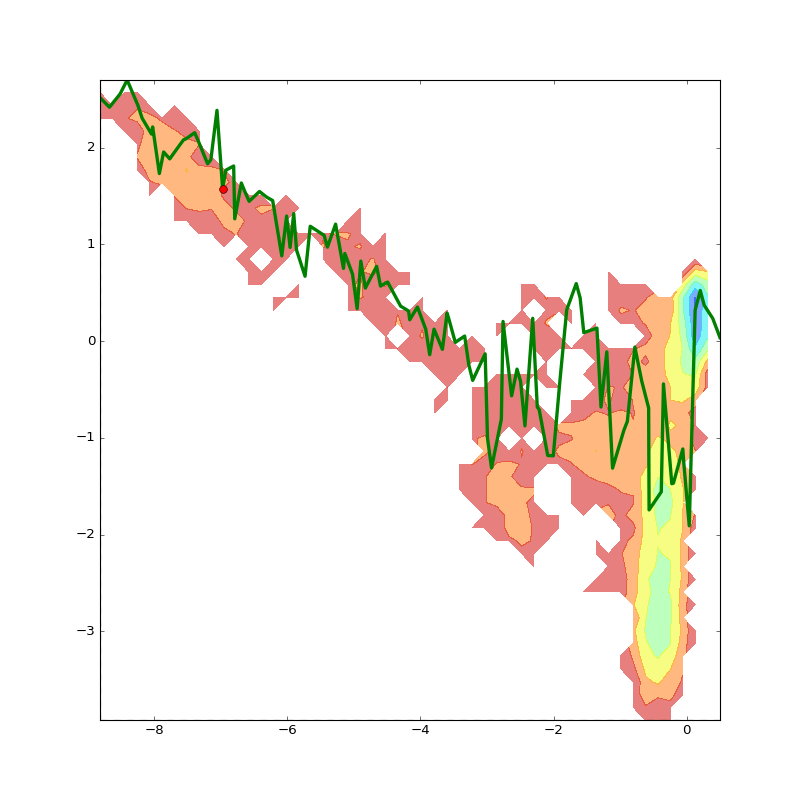

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log


In [5]:
Y = np.load('Y.npy')
plt.figure(figsize=(10,10))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

# Use projX to generate paths along the projections

In [6]:
paths_dict, idata = projX.generate_paths(trajfile, top, 
                                         'Y.npy', 
                                         n_projs=2,
                                         verbose=False, 
                                        )

# Link the PDF plot with the sampled paths/structures and visually explore the coordinate. 
Click either on the plot or on the widget slidebar: they're connected! You can change the type of path between min_rmsd or min_disp and you can also change the coordinate sampled (0 or 1)


In [7]:
coord = 0
path_type = 'min_rmsd'
#path_type = 'min_disp'
igeom = paths_dict[coord][path_type]["geom"]
ipath = paths_dict[coord][path_type]["proj"]
iwdg = projX.visualize_sample(ipath,
                             igeom.superpose(igeom[0]), 
                             plt.gca(), plot_path=True)
iwdg

caught index error with index 103 (new=103, old=102)


# One can also just generate a regspace sample of the data

In [24]:
[:5]

array([[ 0.31273234,  0.09537081],
       [ 0.31273234,  0.09537081],
       [ 0.29147628,  0.39244336],
       [ 0.29147628,  0.39244336],
       [ 0.12403475,  0.17284182]], dtype=float32)

In [25]:
from imp import reload
reload(projX)
sample, geom = projX.generate_sample(trajfile, top, Y, 
                                   keep_all_samples=True,
                                   n_geom_samples=10,
                                   verbose=True)
sample.shape, geom

((6020, 2),
 <mdtraj.Trajectory with 6020 frames, 58 atoms, 58 residues, and unitcells at 0x7f7356fc1ac8>)

<IPython.core.display.Javascript object>


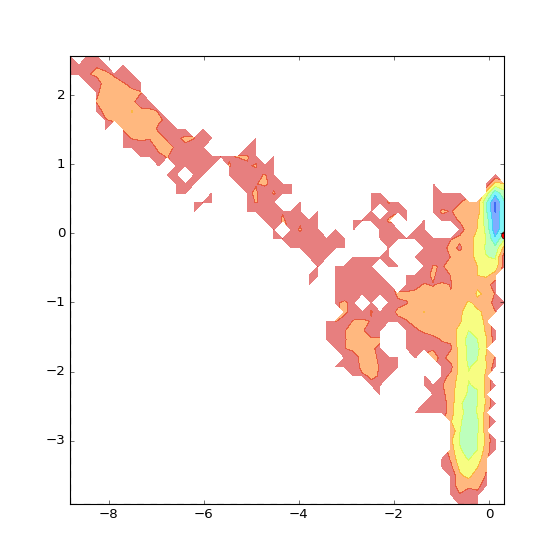

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [27]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)

iwdg = projX.visualize_sample(sample, 
                              geom.superpose(geom[0]),                             
                              plt.gca(), 
                              clear_lines=True,
                              #plot_path=True
                            )
iwdg

# You can even provide your own clustering object...

In [29]:
reload(projX)
clkmeans = pyemma.coordinates.cluster_kmeans(Y, 10)
sample, geom = projX.generate_sample(trajfile, top, clkmeans, n_geom_samples=10, keep_all_samples=True)

15-12-16 11:07:09 pyemma.coordinates.clustering.kmeans.KmeansClustering[8] INFO     Algorithm did not reach convergence criterion of 1e-05 in 10 iterations. Consider increasing max_iter.


<IPython.core.display.Javascript object>


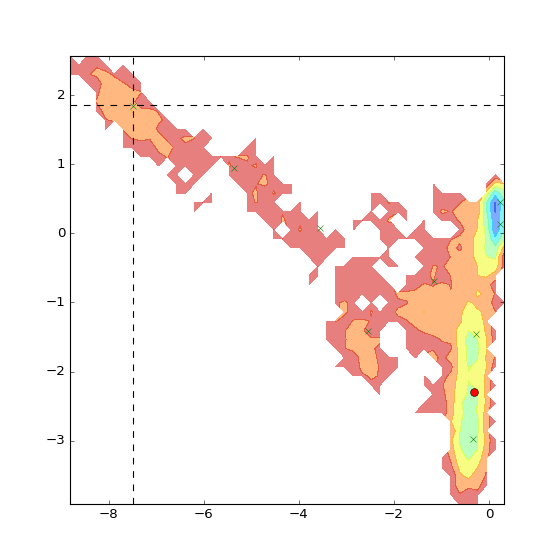

/home/guille/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [31]:
plt.figure(figsize=(7,7))
h, (x,y) = np.histogramdd(Y, bins=50)
plt.contourf(x[:-1], y[:-1], -np.log(h.T), alpha=.50)
plt.plot(clkmeans.clustercenters[:,0], clkmeans.clustercenters[:,1],' xg')
iwdg = projX.visualize_sample(sample, 
                              geom.superpose(geom[0]),                             
                              plt.gca(), 
                              clear_lines=False,
                              #plot_path=True
                            )
iwdg